In [1]:
# Note that this script was pulled from here: https://pytorch.org/vision/main/models#object-detection
# Imports
from torchvision.io.image import read_image

# Explore the torchvision documentation to apply the other models and their weights
from torchvision.models.detection import (
    retinanet_resnet50_fpn_v2,
    RetinaNet_ResNet50_FPN_V2_Weights,
)
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from IPython.display import display

In [2]:
img = read_image("images/image_1.jpg")

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_v2_coco-5905b1c5.pth" to /Users/aisaiahpellecer/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_v2_coco-5905b1c5.pth
100.0%
/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


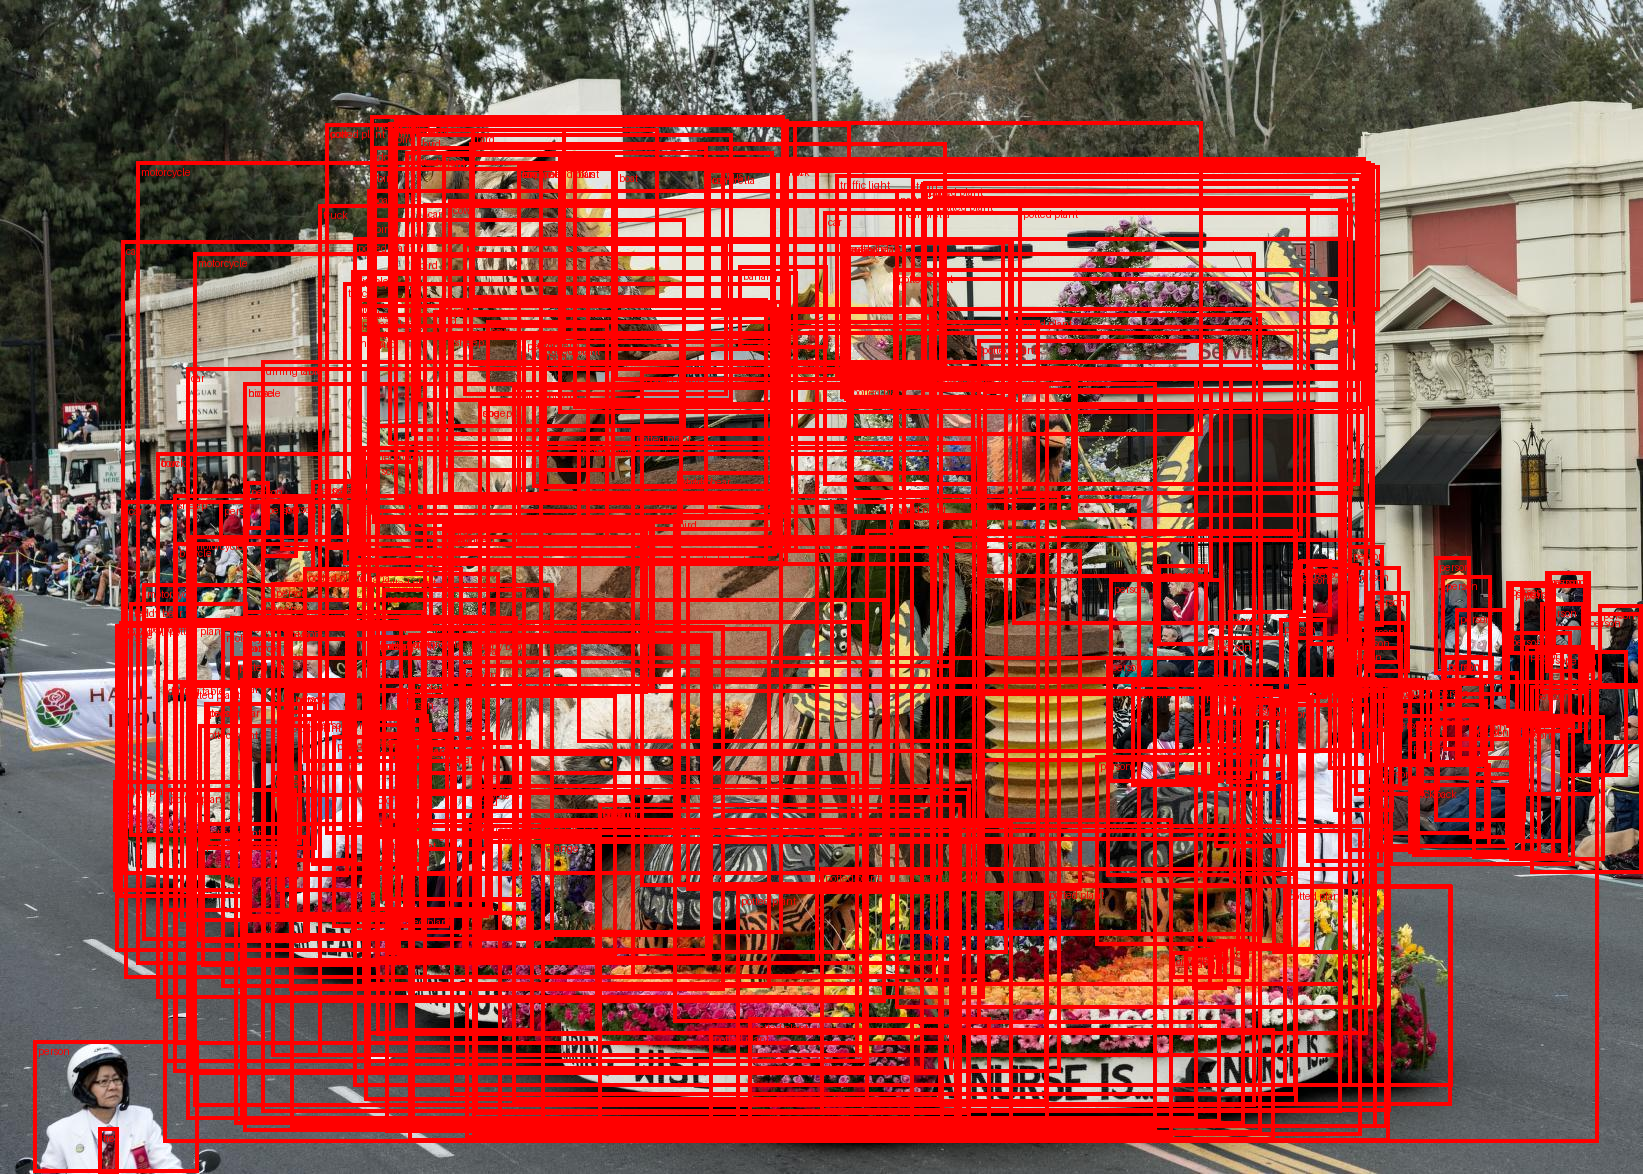

In [3]:
# Step 1: Initialize model with the best available weights
weights = RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT
model = retinanet_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(
    img, boxes=prediction["boxes"], labels=labels, colors="red", width=4, font_size=30
)
im = to_pil_image(box.detach())
# im.show()

# Displays the Image
display(im)

In [10]:
def object_detection(image_path, threshold=0.9):
    img = read_image(image_path)
    # Step 1: Initialize model with the best available weights
    weights = RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT
    model = retinanet_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = [preprocess(img)]

    # Step 4: Use the model and visualize the prediction
    prediction = model(batch)[0]
    labels = [weights.meta["categories"][i] for i in prediction["labels"]]
    box = draw_bounding_boxes(
        img, boxes=prediction["boxes"], labels=labels, colors="blue", width=4, font_size=30
    )
    im = to_pil_image(box.detach())
    # im.show()

    # Displays the Image
    display(im)

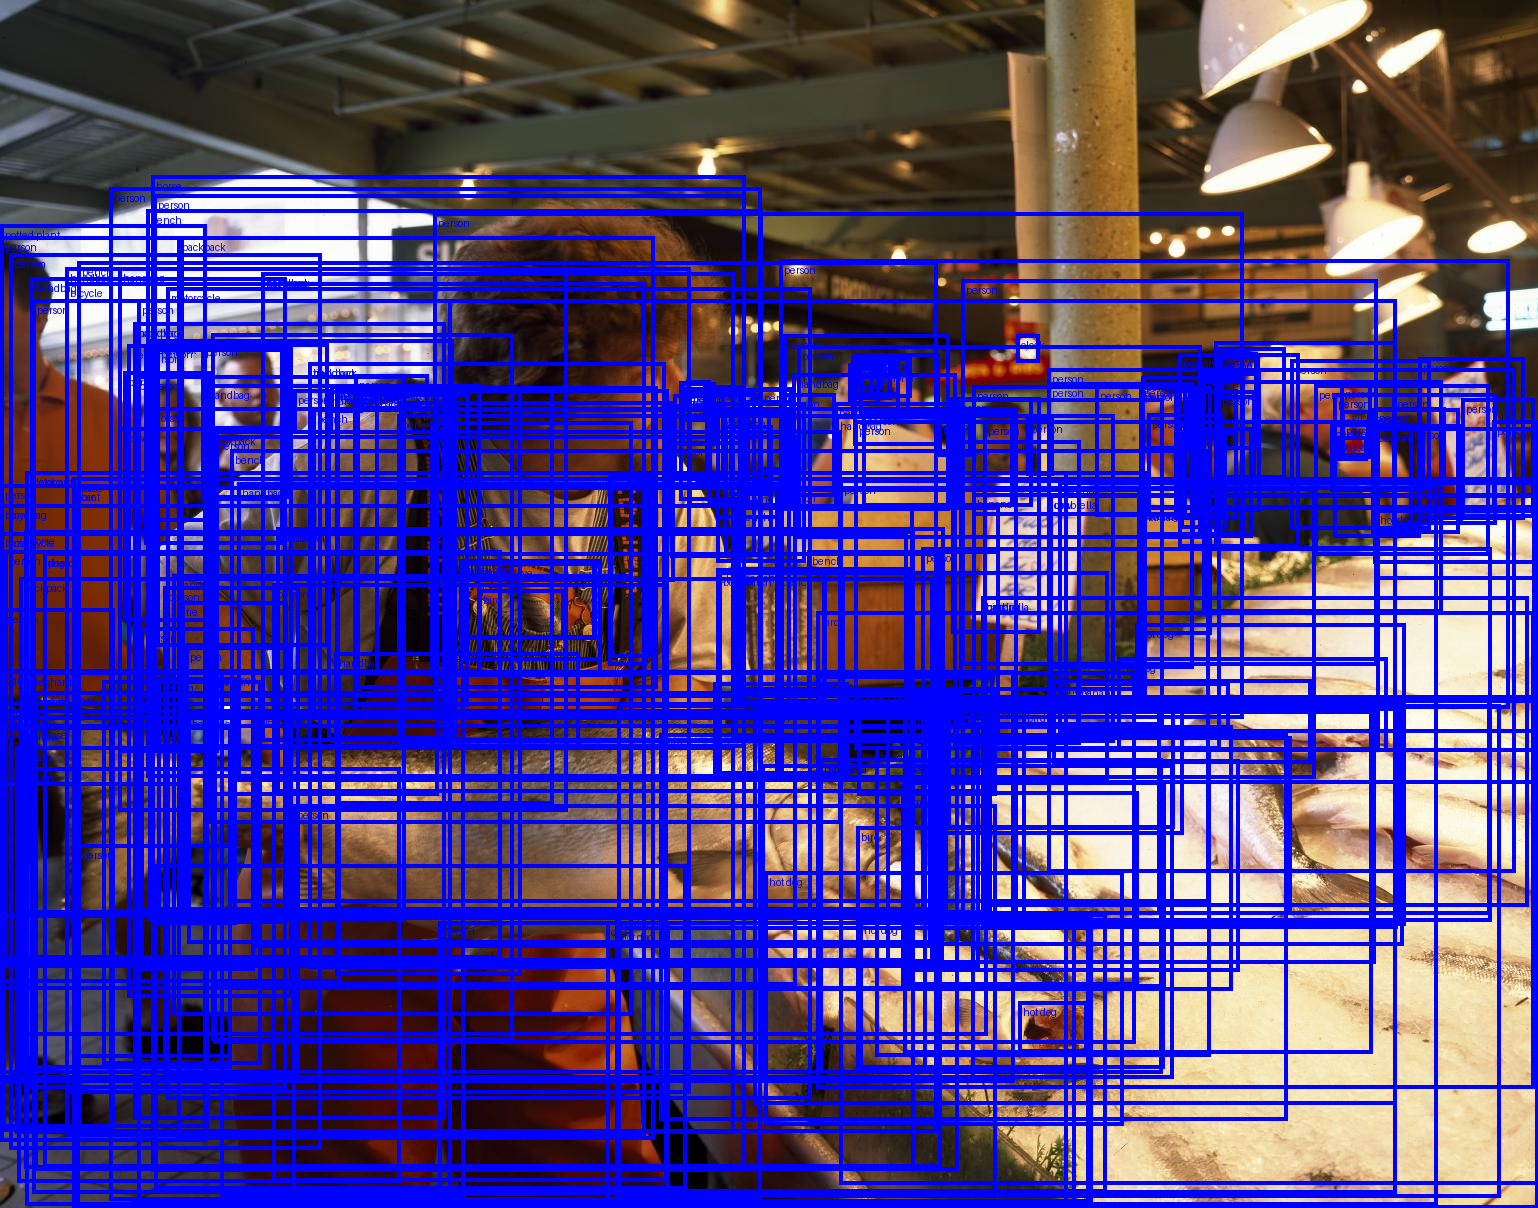

In [11]:
object_detection("images/image_28.jpg")